## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [15]:
# your code here
data= pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
print(data.shape)

(1000, 21)


In [16]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.isnull().sum().sum()
# пропусков нет

0

In [4]:
# колличественные признаки 
data[["duration", 'amount', 'age',]] = data[["duration", 'amount', 'age',]].astype("int64")
#  категориальные переменные
data[["purpose", "personal_status_sex", 
      "other_debtors", "property",
      "other_installment_plans", 
      "housing", "job"]] = data[["purpose", "personal_status_sex", 
                                 "other_debtors", "property",
                                 "other_installment_plans", 
                                 "housing", "job"]].astype("category")

# бинарные переменные - те, которые принимают 2 значения  (например, True и False) =>
binary_val = ["people_liable", "telephone", "foreign_worker", "credit_risk"]
# поряковые переменные
ordinal_val = ["status", "credit_history", "savings", "employment_duration", 
               "installment_rate", "present_residence", "number_credits"]

# ниже ячейка, где все переменные категоризированы по типам

- переменная "people_liable" является бинарной, так как может принимать только 2 значения
- переменная "savings" является порядковой, так как ее значения можно упорядочить
    - значение "unknown/no savings account" равнозначно здесь нулю, остальные значения закодированы в качестве интервалов

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [5]:
# your code here
d = data.groupby("purpose")["amount"].mean()
print(d)

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [18]:
# your code here
print(sum((data["age"] < 30) & (data["housing"] == "rent")) / data.shape[0] * 100)
print(sum((data["age"] > 40) & (data["housing"] == "rent")) / data.shape[0] * 100)

24.6
18.5


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [7]:
# your code here
sum(((data["foreign_worker"] == "yes") & ((data["number_credits"] == "4-5") | (data["number_credits"] == ">=6"))))

1

### Задание 6 (1 балл)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

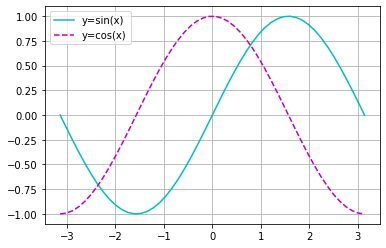

In [9]:
x = np.linspace(-np.pi, np.pi) # интервао от −𝜋 до 𝜋
y = np.sin(x)
y_1 = np.cos(x)
plt.plot(x, y, c= "c") # цвет синусоиды
plt.plot(x, y_1, c= "m", ls="--") # цвет косинусоиды + пунктирное начертание
plt.legend(["y=sin(x)","y=cos(x)"])
plt.grid() # отображение сетки
plt.show()
# На графике изображены синусоида и косинусоида 

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [20]:
# создаем таблицу с тремя колонками:
# 1. размер счета
# 2. является ли положительным кейс (в формате boolean) 
# 3. является ли отрицательным кейс (в формате boolean)
new_table = pd.DataFrame(data["status"])
new_table["good_credit_risk"] = data["credit_risk"] == "good"
new_table["bad_credit_risk"] = data["credit_risk"] != "good"

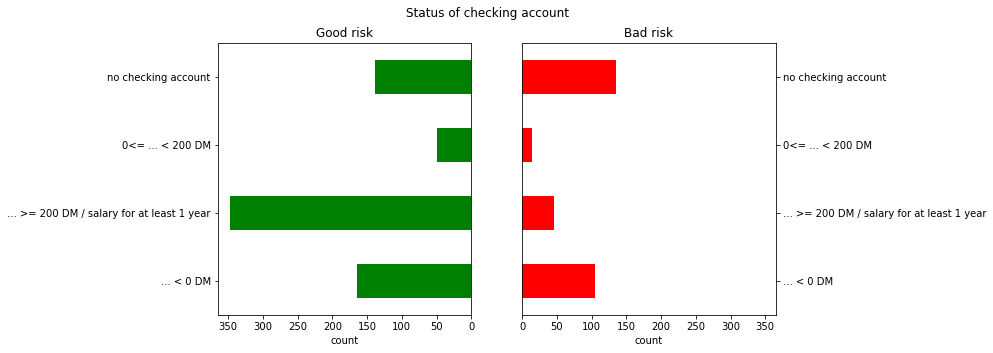

In [39]:
plt.figure(figsize=(10,5)) 
plt.suptitle("Status of checking account") # Задаем название общей диаграммы

plt.subplot(1, 2, 1)
# Создаем горизонтальную диагрмму зеленого цевта. Названия по оси х нет
# А также задаем название "Good risk" и создаем размерность шкалы кол-ва (горизонтальная ось) от 0 до 365, но в обратном направлении
new_table.groupby("status")["good_credit_risk"].sum().plot(kind="barh",  xlabel="", color = "g", title="Good risk").set_xlim(365, 0)
plt.xlabel("count")

plt.subplot(1, 2, 2)
# Создаем горизонтальную диагрмму красного цевта. Названия по оси х нет (вертикальной плоскости в данном случае)
# А также задаем название "Bad risk" и создаем размерность шкалы кол-ва (горизонтальная ось) от 0 до 365 (прямое шкалирование)
new_table.groupby("status")["bad_credit_risk"].sum().plot(kind="barh", color = "r", xlabel="", title="Bad risk").set_xlim(0, 365)
plt.tick_params(axis="y", labelright = True, labelleft = False, right = True, left = False) # перенос названия и делений по оси "y" вправо
plt.xlabel("count")
plt.show()


# Люди, у которых нет счета в банке, практически в равных пропорциях имеют хороший и плохой крединтные риски 
# Для людей с размером счета бот 0 до 200 DM немного более характерно иметь хороший кредитный риск
# Респонденты с размером счета более 200 DM во много раз чаще обладают хорошим кредитным риском, чем плохим кредитным риском 
# Для респондентов с размером счета < 0 DM более вероятно иметь хороший кредитный риск

### Задание 8  (0.5 балла)

In [27]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

Ответ: Данный способ легче - меньше писать кода, результат более наглядный, легко сопоставить и сравнить две категории

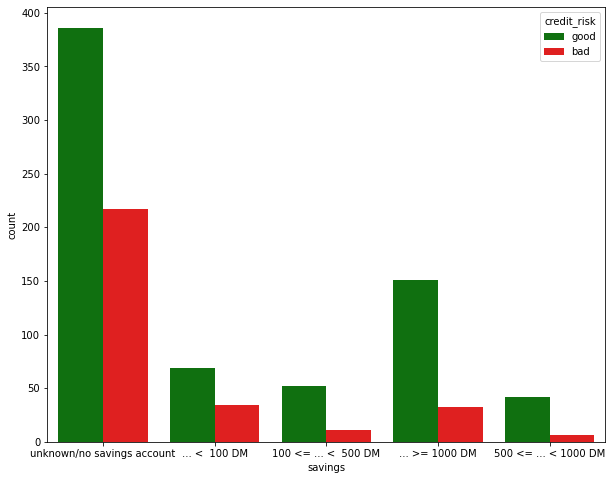

In [13]:

plt.figure(figsize= (10,8)) # размерность диаграммы
sns.countplot(x = "savings", 
              data = data, 
              hue = "credit_risk", # способ группировки
              palette = {"good": "g", "bad": "r"}) # цвет диагрммы по группам 
plt.show()
# Больше всего людей, у которых хороший кредитный риск не имеют сберегательного счета, однако это же характерно и для людей с плохим кредитным риском 
# Второй группой по кол-ву людей с хорошим кредитным риском является группа, в которой размер сбер счета составляет более 1000 
# Среди всех типов размеров сберегательных счетов преобладают люди с хорошим кредитным рииском
# Наименьшее количество людей с плохим кредитным риском наблюдается среди тех, чей размер сбер счета от 500 до 1000

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

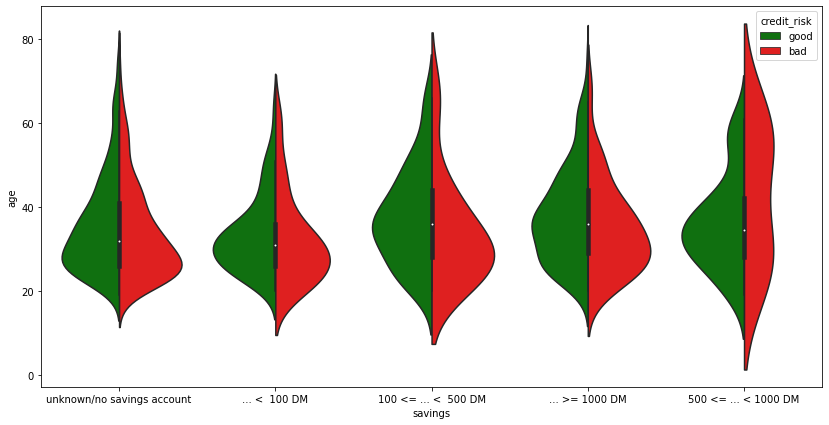

In [14]:
plt.figure(figsize= (14,7)) # размерность диаграммы

sns.violinplot(x = "savings", 
               y = "age", 
               data = data, 
               hue = "credit_risk", # условие группировки
               split=True, 
               palette= {"good": "g", "bad": "r"} # цвета по категориям 
              )
plt.show()
# Во всех группах по размеру сберегательного счета в целом большее количество людей с хорошим кредитным риском находится в диапазоне 25-35 лет
# Во всех группах по размеру сберегательного счета в целом большее количество людей с плохим кредитным риском находится в диапазоне 20-30 лет
# В последней группе по размеру сбер счета нет явно выраженного возраста с преобладающим кол-вом людей с плохим кредитным риском
# Он практически равномерно распредлен в возрасте от 20 до 60 лет.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

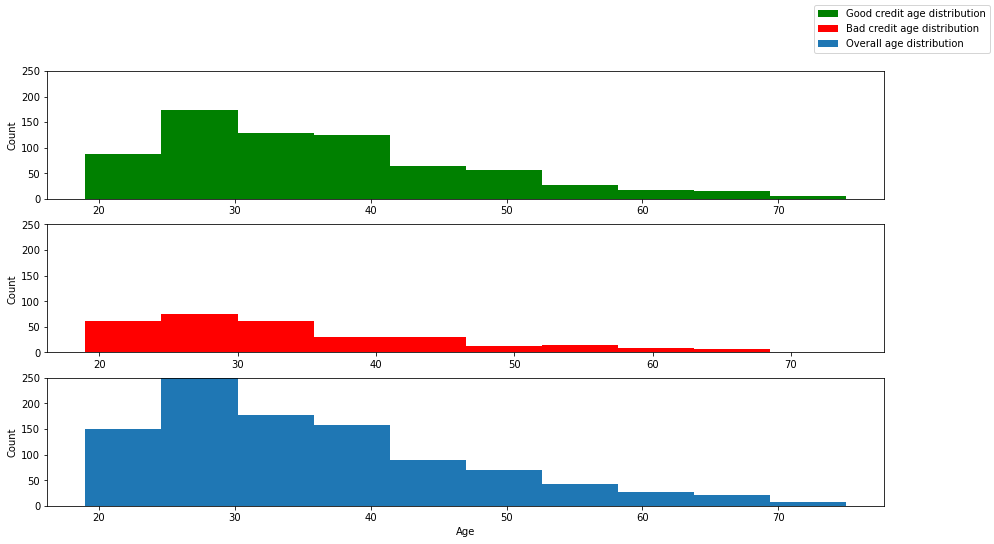

In [11]:
x1 = data.loc[data.credit_risk=='good', 'age'] # возраст всех респондентов, которые имеют хороший кредитный риск
x2 = data.loc[data.credit_risk=='bad', 'age'] # возраст всех респондентов, которые имеют плохой кредитный риск
x3 = data.loc[data.credit_risk!=None, 'age'] # возраст всех респондентов, которые имеют хоть какой-то кредитный риск

fig = plt.figure(figsize=(15,8))

plt.subplot(3,1,1)
plt.hist(x1, color="g") # первая гистограмма зеленого цвета
plt.ylabel("Count") 
plt.ylim(0,250) # значения по оси у от 0 до 250
plt.subplot(3,1,2)
plt.hist(x2, color="r")
plt.ylabel("Count") # вторая гистограмма красного цвета
plt.ylim(0,250) # значения по оси у от 0 до 250
plt.subplot(3,1,3)
plt.hist(x3) # третья гистограмма синего цвета
plt.ylabel("Count")
plt.xlabel("Age")
plt.ylim(0,250) # значения по оси у от 0 до 250


fig.legend(["Good credit age distribution", "Bad credit age distribution", "Overall age distribution"]) # легенда

plt.show()

# Большее количество людей с хорошим кредитным риском имеют возраст от 25 до 30. Аналогично и для людей с плохим кредитным риском
#Чем больше возраст, тем меньше людей имеют 

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

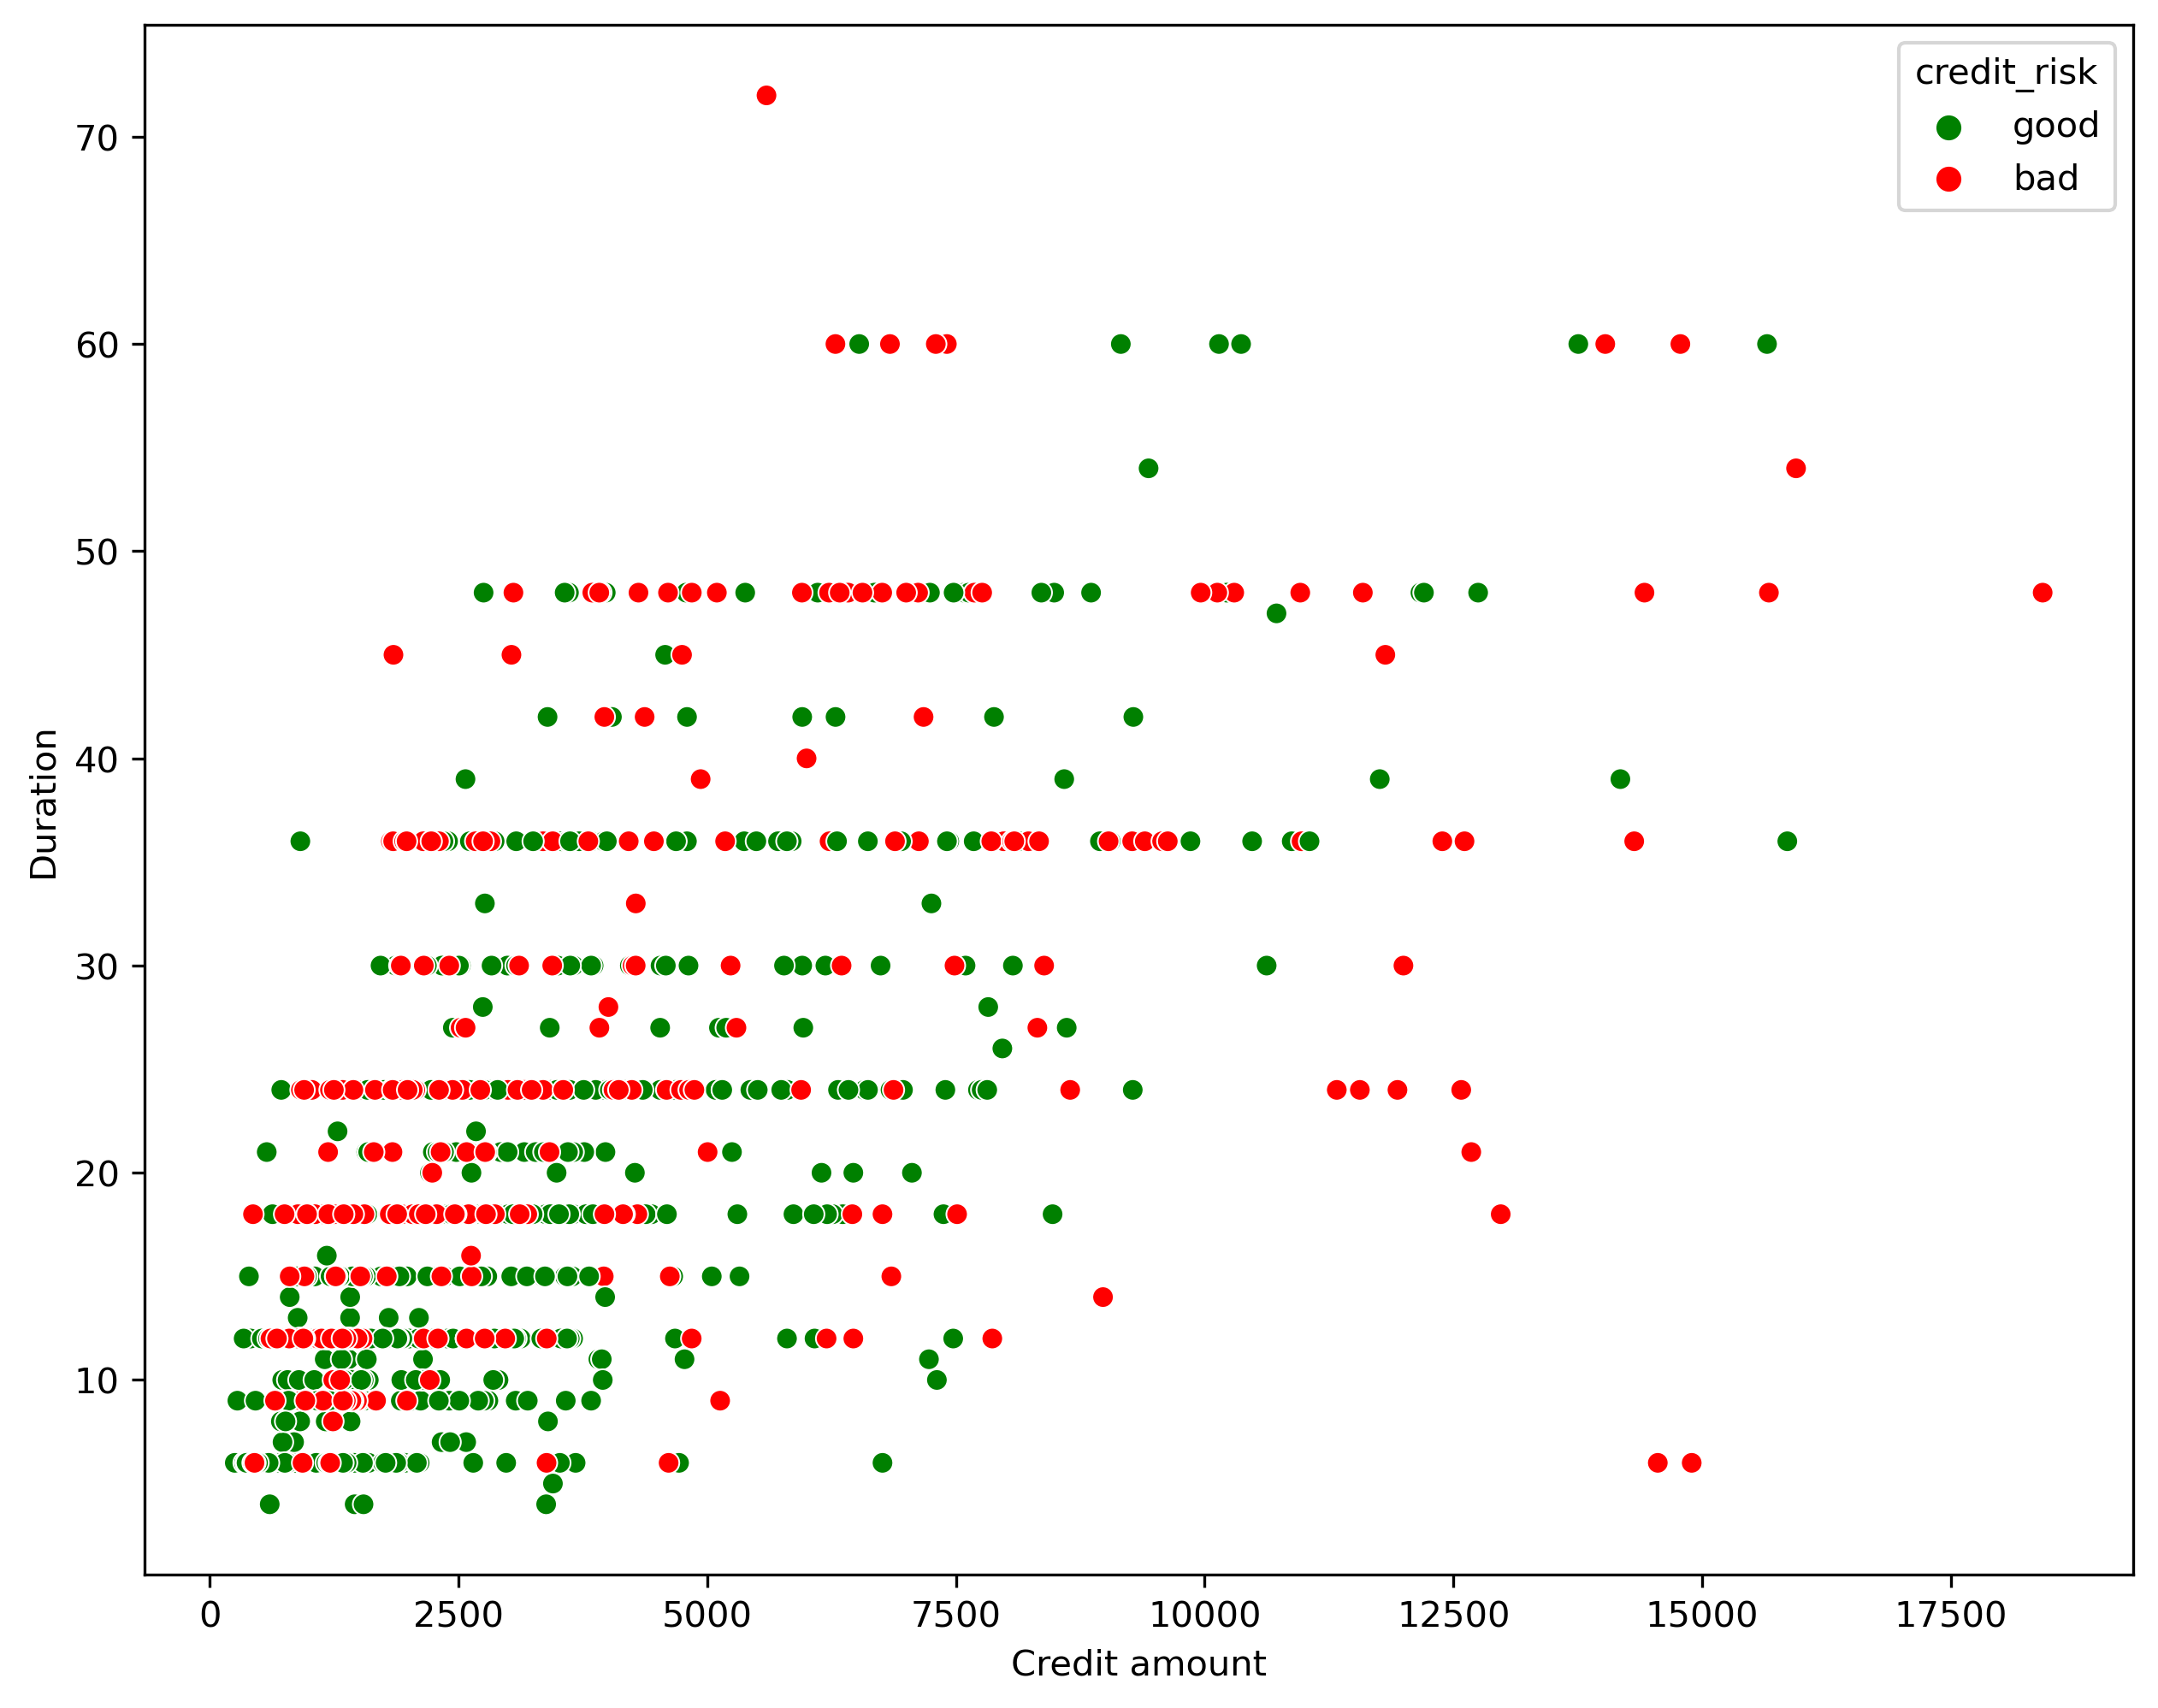

In [40]:
# через seaborn 
plt.figure(figsize=(10,8), dpi = 300)
sns.scatterplot(x = data['amount'], 
                y = data['duration'], 
                data = data, 
                hue = "credit_risk",
               palette = {"good": "green", "bad": "red"})
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.show()

# в целом между продолжительностью и рамером кредита наблюдается слабая положительная зависимость
# В случае с отрицательными кейсами данная связь более неочевидна, так как на графике есть много не типичных значений

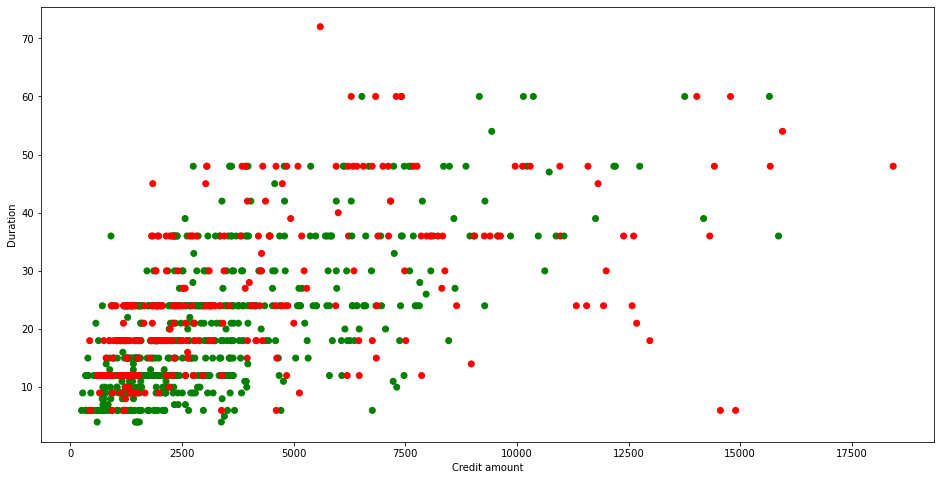

In [55]:
# через matplotlib 
plt.figure(figsize=(16,8))
colours = {"good": "green", "bad": "red"} # хорошие кейсы - зеленый, плохие - красный
colour_list = [colours[i] for i in data["credit_risk"]] # список из цветов для каждого кейса из таблицы в зависимости от того, хороший он или плохой
plt.scatter(data['amount'], data['duration'], c=colour_list) # сам график
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.show()
# в целом между продолжительностью и рамером кредита наблюдается слабая положительная зависимость
# В случае с отрицательными кейсами данная связь более неочевидна, так как на графике есть много не типичных значений

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

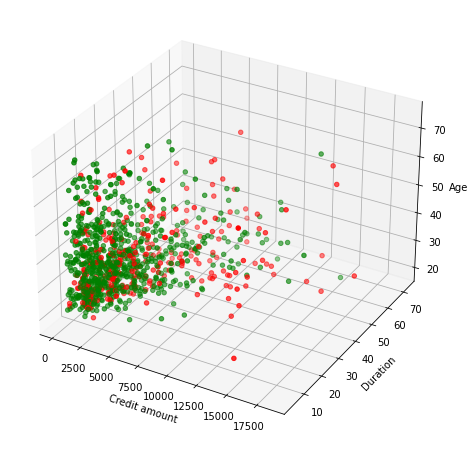

In [60]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection= "3d") # формат графика трехмерный
colours = {"good":"green", "bad": "red"} # хорошие кейсы - зеленый, плохие - красный
colour_list = [colours[i] for i in data["credit_risk"]] # список из цветов для каждого кейса из таблицы в зависимости от того, хороший он или плохой
fg = ax.scatter3D(data['amount'], data['duration'], data['age'], c=colour_list) # сам график с тремя осями и цветами
# названия для всех осей
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

# Наибольшеая концентрация положительных кейсв наблюдается в ворастном диапазоне от 20 до 35 лет 
# со сроком кредита в 20-40 месяцев и размером менее 2500 д.е.
# В целом отрицательные кейсы имеют приблизительно такое же распределение, но с большей распыленностью облака значений

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [63]:
data["status"] = data["status"].map({'... < 0 DM': 0,
                                     '0<= ... < 200 DM': 1,
                                     '... >= 200 DM / salary for at least 1 year': 2, 
                                     "no checking account": 3
                                    })

data["savings"] = data["savings"].map({'... <  100 DM': 0,
                                       '100 <= ... <  500 DM': 1,
                                       '500 <= ... < 1000 DM': 2, 
                                       '... >= 1000 DM': 3,
                                       'unknown/no savings account': 4
                                      })

data["employment_duration"] = data["employment_duration"].map({"unemployed": 0,
                                                               '< 1 yr': 1,
                                                               '1 <= ... < 4 yrs': 2, 
                                                               '4 <= ... < 7 yrs': 3,
                                                               '>= 7 yrs': 4
                                                              })

data["number_credits"] = data["number_credits"].map({'1': 0,
                                                     '2-3': 1,
                                                     '4-5': 2, 
                                                     '>= 6': 3
                                                    })

data["installment_rate"] = data["installment_rate"].map({'< 20': 0,
                                                         '20 <= ... < 25': 1,
                                                         '25 <= ... < 35': 2,
                                                         '>= 35': 3
                                                        })
                                                         
data["present_residence"] = data["present_residence"].map({'< 1 yr': 0,
                                                           '1 <= ... < 4 yrs': 1,
                                                           '4 <= ... < 7 yrs': 2, 
                                                           '>= 7 yrs': 3
                                                          })
data["people_liable"] = data["people_liable"].map({'0 to 2': 0,
                                                   '3 or more': 1
                                                  })
                                                         
data["telephone"] = data["telephone"].map({"no": 0,
                                           "yes (under customer name)": 1,
                                          })

data["foreign_worker"] = data["foreign_worker"].map({"no": 0,
                                                     "yes": 1,
                                                    })   

data["credit_risk"] = data["credit_risk"].map({"bad": 0,
                                               "good": 1,
                                              }) 

In [64]:
# избавляемся от категор. признаков
data = data[["status", 
                 "duration", 
                 "amount", 
                 "savings", 
                 "employment_duration", 
                 "installment_rate",
                 "present_residence", 
                 "age", 
                 "number_credits",
                 "people_liable", 
                 "telephone",
                 "foreign_worker",
                 "credit_risk"]] 

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [81]:
def predict(Xtest: np.array) -> np.array:
# проходимся по кажому респонденту в выборке и проверяем:
# если  savings == 4 и status == 2 и people_liable == 0  -> кредитный риск у такого человека == 0
# иначе - 1
    s = np.array([0  if  (i[3]==2 and i[0] == 2 and i[-4] == 0) else 1 for i in Xtest])
    return (s)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

/var/folders/62/cb_ccmv14l11vw00mnvlnxrm0000gn/T/ipykernel_90434/2730030843.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.656